*  Vamos a aplicar un modelo de Regresion Logistica, para predecir  que posicion de la cancha ocupa el jugador, segun variables.

In [43]:
# importamos las variables a utlizar.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
df=pd.read_csv("./data.csv")
df.head(2)

,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [18]:
# Dividir los datos en características (X) y la variable objetivo (y)
X = df[['Altura', 'Edad', 'Apariciones', 'Goles', 'Asistencias', 'Tarjetas Amarillas', '2da Tarjeta Amarillas', 
        'Tarjetas Rojas', 'Goles Concedidos', 'Valla Invicta', 'Minutos Jugados', 'Dias De baja por Lesion', 
        'Partidos Perdidos por Lesion', 'Premios', 'Valor Actual', 'Valor Maximo', 'Posicion Numero']]
y = df['Posicion']

In [30]:
# Divido  los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Estandarizar las características de los conjuntos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Instancia del modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

In [33]:
# Entrenar el modelo en los datos de entrenamiento escalados (estandarizados)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [34]:
# Ejecutar la predicción en los datos de prueba
y_pred = log_reg.predict(X_test_scaled)

In [45]:
# Precision  del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.6141329614132961


In [40]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))


                            precision    recall  f1-score   support

                    Attack       0.00      0.00      0.00        12
     Attack Centre-Forward       0.63      0.91      0.75       268
         Attack-LeftWinger       0.44      0.43      0.43       132
        Attack-RightWinger       0.47      0.19      0.28       154
      Attack-SecondStriker       0.00      0.00      0.00        15
                  Defender       0.00      0.00      0.00         2
      Defender Centre-Back       0.69      0.94      0.80       377
        Defender Left-Back       0.34      0.16      0.22       145
       Defender Right-Back       0.48      0.53      0.51       169
                Goalkeeper       1.00      0.90      0.95       257
                  midfield       0.00      0.00      0.00        11
midfield-AttackingMidfield       0.65      0.40      0.49       168
  midfield-CentralMidfield       0.47      0.65      0.55       235
midfield-DefensiveMidfield       0.48      0.41

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [26]:
# Mostrar la matriz de confusión con los valores reales vs. predichos
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[  0   8   3   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 243  15   8   0   0   0   0   0   0   0   0   0   2   0   0]
 [  0  49  57  24   0   0   0   0   0   0   0   0   0   2   0   0]
 [  0  71  52  30   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0  10   4   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 356  10  10   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  38  23  83   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  46  33  90   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  23   0   3 231   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   5   4   0   0]
 [  0   1   0   0   0   0  11   0   0   0   0  67  77  12   0   0]
 [  0   0   0   0   0   0  11   0   0   0   0  19 152  53   0   0]
 [  0   1   0   0   0   0  26   0   0   0   0   6  70  72   0   0]
 [  0   0   0   0   0   0   0   0   0   0

*  La matriz de confusión muestra la relación entre las predicciones del modelo y las clases reales en un problema de clasificación.

*   En este caso, la matriz de confusión revela que el modelo tiene dificultades para clasificar correctamente algunas clases, como "Attack Centre-Forward" y "Defender Centre-Back", con un mayor número de falsos negativos y falsos positivos en estas clases en comparación con otras. Además, hay clases con un número significativo de predicciones incorrectas, como "midfield-AttackingMidfield" y "midfield-CentralMidfield".

In [28]:
# Muestro las  etiquetas únicas en los datos de prueba y en las predicciones
print("Etiquetas únicas en y_test:", np.unique(y_test))
print("Etiquetas únicas en y_pred:", np.unique(y_pred))

Etiquetas únicas en y_test: ['Attack' 'Attack Centre-Forward' 'Attack-LeftWinger' 'Attack-RightWinger'
 'Attack-SecondStriker' 'Defender' 'Defender Centre-Back'
 'Defender Left-Back' 'Defender Right-Back' 'Goalkeeper' 'midfield'
 'midfield-AttackingMidfield' 'midfield-CentralMidfield'
 'midfield-DefensiveMidfield' 'midfield-LeftMidfield'
 'midfield-RightMidfield']
Etiquetas únicas en y_pred: ['Attack Centre-Forward' 'Attack-LeftWinger' 'Attack-RightWinger'
 'Defender Centre-Back' 'Defender Left-Back' 'Defender Right-Back'
 'Goalkeeper' 'midfield-AttackingMidfield' 'midfield-CentralMidfield'
 'midfield-DefensiveMidfield']


*  La precisión del modelo de regresión logística fue del 61.41%. Esto significa que el modelo fue capaz de predecir correctamente la posición de los jugadores de fútbol en aproximadamente el 61.41% de los casos evaluados.

*  Analizando las metricas que dieron las herramientas de regresion logistica, mas precisamente el reporte de claficacion, podemos hacer una breve conclusion.

*  Precision: Indica qué tan confiables son las predicciones positivas del modelo. La precisión promedio del modelo es del 61%, lo que significa que alrededor del 61% de las predicciones positivas son correctas en todas las clases de posiciones.

*  Recall: Indica la capacidad del modelo para identificar correctamente las instancias positivas.El recall promedio del modelo es del 35%, lo que significa que el modelo identifica correctamente alrededor del 35% de las instancias positivas en todas las clases de posiciones.

*  F1-score: El F1-score es una medida de la precisión y el recall, que combina ambas métricas en una sola puntuación. El F1-score promedio del modelo es del 34%.


*  Support: El soporte indica el número de instancias de cada clase en el conjunto de datos de prueba. Por ejemplo, para la categoría "Defender Centre-Back", hay 377 instancias en el conjunto de prueba.  En este modelo, el soporte varía para cada clase de posición de jugador.

*    Conclusiones Generales: Las métricas de evaluación del modelo indican que si bien el modelo logra una precisión promedio del 61%, el recall y el F1-score son más bajos, alrededor del 35% y 34% respectivamente. Esto sugiere que el modelo puede tener dificultades para identificar correctamente todas las clases de posiciones de jugadores.

*   Basándonos, y teniendo en cuenta las métricas proporcionadas y en la evaluación del modelo, parece haber una tendencia hacia el underfitting (subajuste). Esto se sugiere por el hecho de que las métricas de precisión, recall y F1-score son relativamente bajas, lo que indica que el modelo no está capturando suficientemente bien la complejidad de los datos. Además, la discrepancia entre la precisión y el recall, así como el bajo F1-score, señalan que el modelo puede estar teniendo dificultades para equilibrar la capacidad de hacer predicciones precisas con la capacidad de capturar todos los casos relevantes.

*  Se puede aplicar los modelos de arboles de decision o bosques aleatorios, para abordar el subajuste y mejorar el rendimiento del modelo de clasificación en este contexto.

*                     Visualización de la Matriz de Confusión con un Mapa de Calor

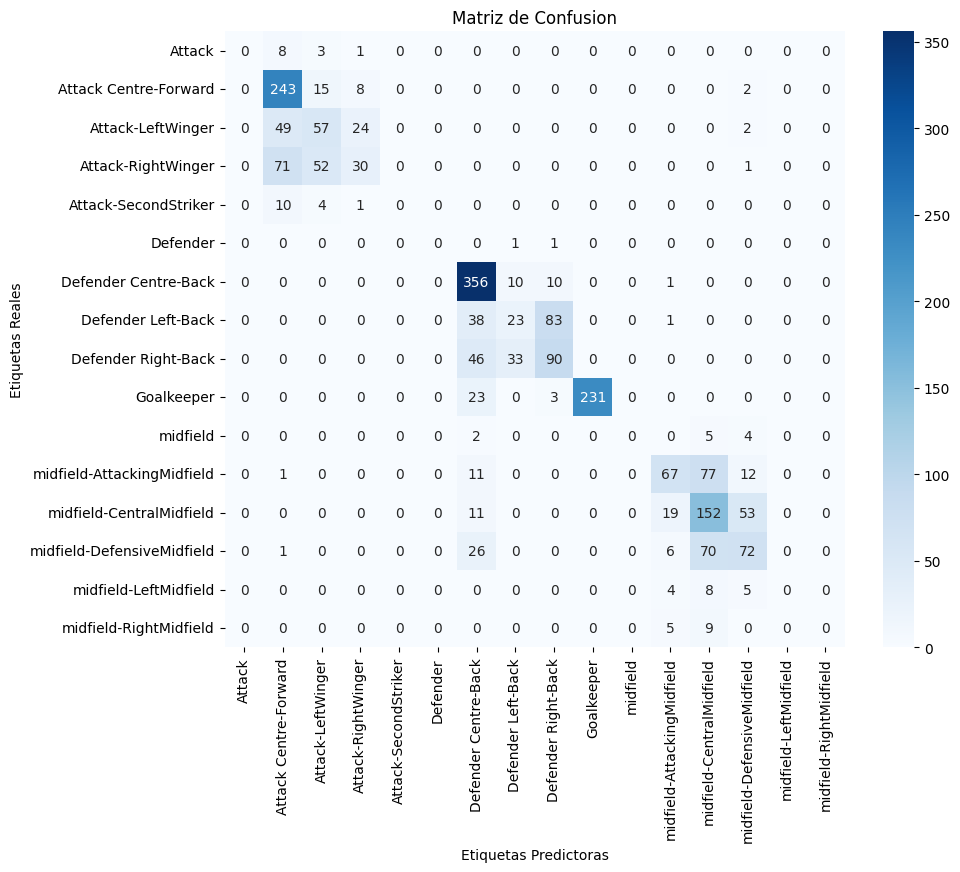

In [44]:

# Definir etiquetas de las clases
clases = ['Attack', 'Attack Centre-Forward', 'Attack-LeftWinger', 'Attack-RightWinger', 
           'Attack-SecondStriker', 'Defender', 'Defender Centre-Back', 'Defender Left-Back', 
           'Defender Right-Back', 'Goalkeeper', 'midfield', 'midfield-AttackingMidfield', 
           'midfield-CentralMidfield', 'midfield-DefensiveMidfield', 'midfield-LeftMidfield', 
           'midfield-RightMidfield']

# Creo el grafico con la matriz que elabore arriba
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=clases, yticklabels=clases)
plt.xlabel('Etiquetas Predictoras')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusion')
plt.show()

*  Las regiones más intensas en el mapa de calor reflejan una alta concentración de predicciones precisas, lo que indica un buen rendimiento del modelo en algunas clases. Sin embargo, las áreas más claras señalan posibles errores de clasificación, resaltando la necesidad de mejorar la capacidad del modelo para distinguir entre ciertas clases.